In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from geometry import PupilGeometry

In [2]:
pupil = PupilGeometry()

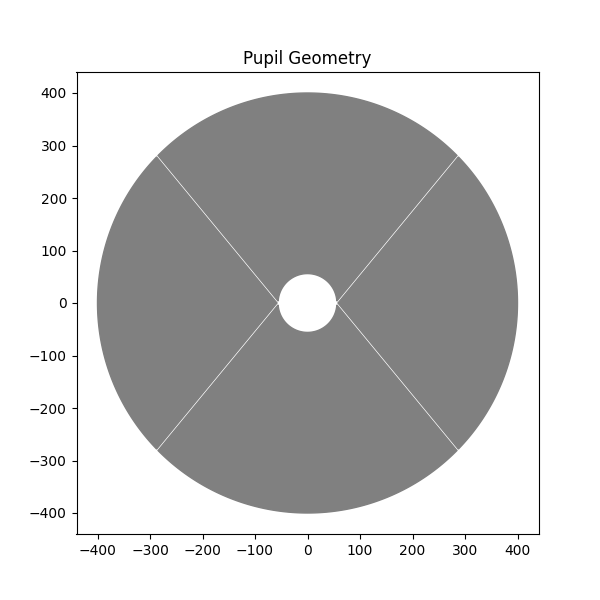

In [3]:
pupil.plot_pupil()


In [4]:
x, y, weights = pupil.create_pixel_weights(num_pixels=400)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
import numpy as np
plt.imshow(weights.T, cmap='gray_r', extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
#plt.colorbar()

In [ ]:
from astropy.io import fits
hdu = fits.PrimaryHDU(weights)
hdu.header['XMIN'] = x.min()
hdu.header['XMAX'] = x.max()
hdu.header['YMIN'] = y.min()
hdu.header['YMAX'] = y.max()
hdul = fits.HDUList([hdu])
hdul.writeto('gray_pupil.fits')


In [ ]:
data,hdr = fits.getdata('gray_pupil.fits',header=True)
xmin = hdr['XMIN']
xmax = hdr['XMAX']
ymin = hdr['YMIN']
ymax = hdr['YMAX']
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(data.T, cmap='gray_r', extent=(xmin, xmax, ymin, ymax), origin='lower')

In [ ]:
np.linspace(-1,1,3)

In [ ]:
import numpy as np
import shapely
import shapely.geometry as geom
from shapely.ops import unary_union
from shapely.geometry import Polygon, box, Point, MultiPolygon
from shapely.affinity import rotate
from shapely.prepared import prep

cercle = Point(0,0).buffer(1)
box1 = box(-1, -1, 0, 0)
print(cercle.intersection(box1).area)
box2 = box(0, 0, 1, 1)
print(cercle.intersection(box2).area)
box3 = box(-1, 0, 0, 1)
print(cercle.intersection(box3).area)
box4 = box(0, -1, 1, 0)
print(cercle.intersection(box4).area)

In [ ]:
cercle = Point(0,0).buffer(1,resolution=4)

In [ ]:
800*0.008